Импортируем библиотеки и напишем нужные функции

In [2]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(w, X, y):
    # здесь должны быть рассчитаны параметры градиента и значение функции потерь
    N = X.shape[0]
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    grad = np.dot(X.T, (y_pred - y)) / N
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)
    return w, losses

def predict(w, X, b=0.5):
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    y_pred_class = (y_pred > b).astype(int)
    return y_pred_class


Опишем эксперимент с генерацией данных:
Создается массив X размером 100x2, где каждая строка представляет собой набор признаков для одного образца. Значения в массиве X генерируются из стандартного нормального распределения (среднее = 0, стандартное отклонение = 1).
К массиву X добавляется столбец единиц (свободный член - bias). Теперь массив X имеет размер 100x3, где первый столбец состоит из единиц.

Целевые значения y генерируются на основе линейной комбинации признаков X[:, 1] и X[:, 2] с добавлением шума. Шум добавляется с помощью np.random.randn(100) * 0.5, что означает, что к каждому значению добавляется случайное число из нормального распределения с стандартным отклонением 0.5.
Затем проверяется, больше ли сумма признаков и шума нуля. Если да, то соответствующее значение в y устанавливается в 1, иначе — в 0. Таким образом, y становится бинарным вектором.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация случайных данных
np.random.seed(42)
X = np.random.randn(100, 2)
X = np.hstack([np.ones((X.shape[0], 1)), X])
y = (X[:, 1] + X[:, 2] + np.random.randn(100) * 0.5 > 0).astype(int)

# Инициализация весов
w = np.zeros(X.shape[1])

# Обучение модели
n_iterations = 1000
eta = 0.1
w, losses = optimize(w, X, y, n_iterations, eta)


Нарисуем график функции потерь

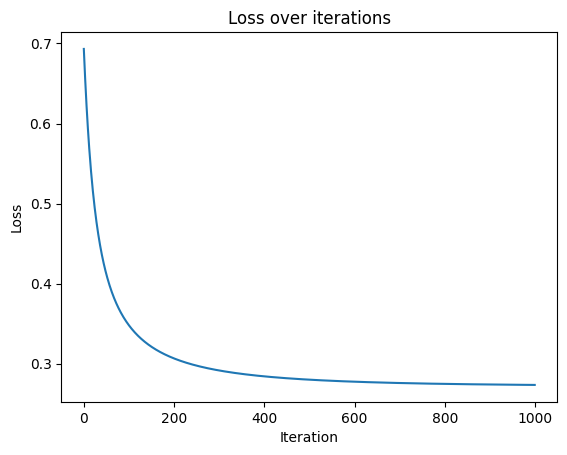

Accuracy: 0.90


In [11]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

y_pred = predict(w, X)
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy:.2f}')

Выводы:
Значение функции потерь уменьшается с увеличением числа итераций. Т.е.  успешно обучается и веса корректируются в правильном направлении.
Итоговое значение стабилизоровалось на уровне 0.2.

Дополнительные вопросы:

Как влияет размер шага (eta) на сходимость алгоритма?
Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?
Почему логистическая регрессия подходит для задач только бинарной классификации?

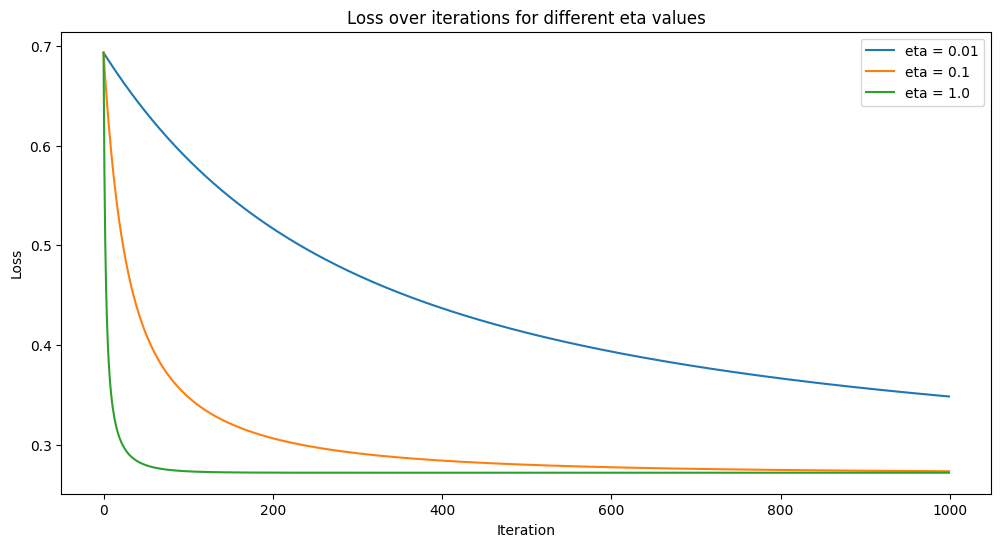

In [13]:
#проверим сходимость с разными шагами
etas = [0.01, 0.1, 1.0]
n_iterations = 1000

plt.figure(figsize=(12, 6))

for eta in etas:
    w = np.zeros(X.shape[1])  # Инициализация весов
    w, losses = optimize(w, X, y, n_iterations, eta)
    plt.plot(losses, label=f'eta = {eta}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations for different eta values')
plt.legend()
plt.show()

Видно, что при eta=1.0 функция потерь приближается к минимуму быстрее,
а при eta=0.01 функция потерь сильно далека от идеала.


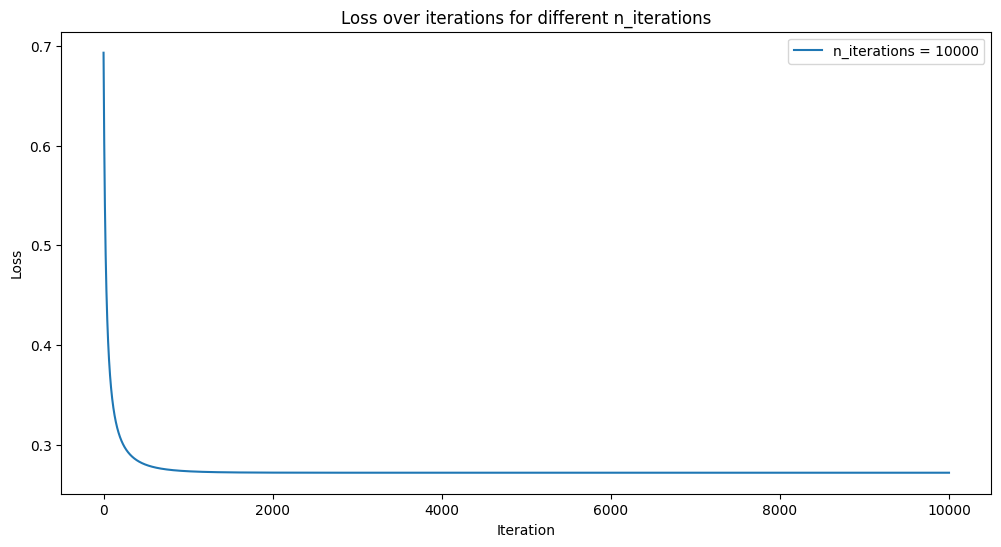

In [29]:
#посмотрим разное количество итераций
n_iterations_list = [10000]
eta = 0.1

plt.figure(figsize=(12, 6))

for n_iterations in n_iterations_list:
    w = np.zeros(X.shape[1])
    w, losses = optimize(w, X, y, n_iterations, eta)
    plt.plot(losses, label=f'n_iterations = {n_iterations}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations for different n_iterations')
plt.legend()
plt.show()

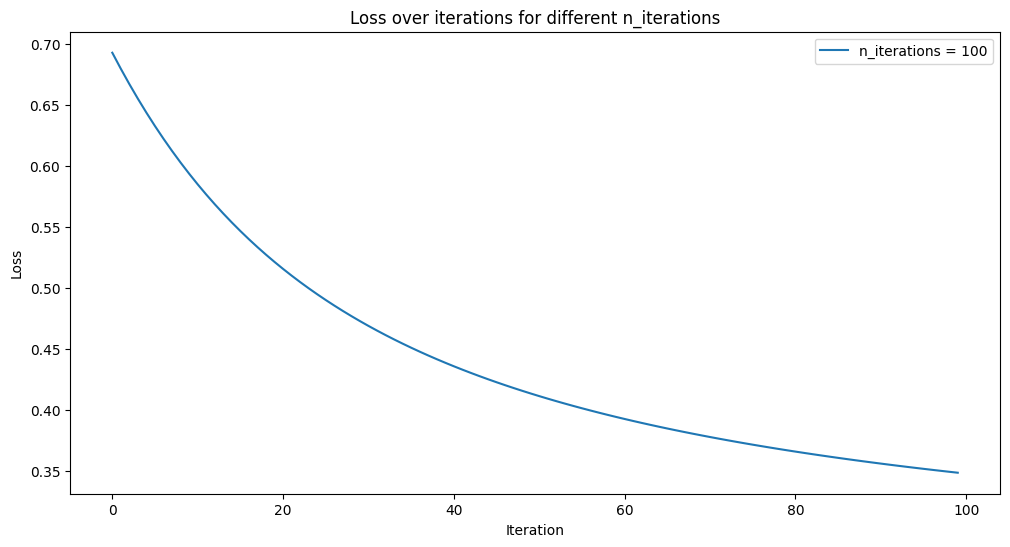

In [32]:
#посмотрим разное количество итераций
n_iterations_list = [100]
eta = 0.1

plt.figure(figsize=(12, 6))

for n_iterations in n_iterations_list:
    w = np.zeros(X.shape[1])
    w, losses = optimize(w, X, y, n_iterations, eta)
    plt.plot(losses, label=f'n_iterations = {n_iterations}')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations for different n_iterations')
plt.legend()
plt.show()

Количество итераций само собой влияет на сходимость. Если выбрать слишком маленькое значение итераций, то функция ошибки просто не сойдется к минимуму. А при большом значении и нормальных весах мы просто будем долго-долго крутиться вокруг одного значения, т.е. при коэффициенте 0.1 смысла нет ставить больше 1500 итераций.

Почему логистическая регрессия подходит для задач только бинарной классификации? Потому что Логистическая регрессия — это частный случай линейного классификатора. Она обладает одной полезной особенностью — помимо отнесения объекта к определенному классу умеет прогнозировать вероятность  того, что объект относится к этому классу. (ответ из модуля)